# Machine-learning analysis - Balanced dataset - Only TNBC - Hugo and Variant type - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [55]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_onlyTNrelgenes_q1_withLabels_VARIANTCLASS_afterMutCLust_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [5]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [6]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_008,0
brca_smc_2018_BB01_010,0
...,...
MBCProject_pyhbI1H5,0
MBCProject_rJHBiKTl,1
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0


In [7]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust


There aren't patients with zero mutations.

In [57]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyhugo_onlyTN_test_pts_q1 = pd.read_csv('Test_onlyTN_onlyhugo_q1_4B.txt', sep=',', engine='python')
onlyhugo_onlyTN_test_pts_q1

,Patient
0,brca_smc_2018_BB01_126
1,brca_smc_2018_BR097
2,brca_smc_2018_BR145
3,brca_smc_2018_BR301
4,brca_smc_2018_BR419
...,...
131,TCGA-GM-A2DL
132,TCGA-BH-A0W7
133,TCGA-AN-A0AS
134,MBCProject_6zfRF2fl


In [58]:
onlyhugo_onlyTN_test_pts_q1_list = onlyhugo_onlyTN_test_pts_q1['Patient'].to_list()
onlyhugo_onlyTN_test_pts_q1_list

['brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_67',
 'MBC_182',
 'MBC_204',
 'MBC_205',
 'MBC_215

In [60]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [61]:
class_count_0

786

In [62]:
class_count_1

272

In [63]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (786, 168)
Target 1 - TN: (272, 168)


In [64]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_008
3,brca_smc_2018_BB01_010
4,brca_smc_2018_BB01_012
...,...
781,MBCProject_pktAIxFb
782,MBCProject_pyhbI1H5
783,MBCProject_rYSXcxcV
784,MBCProject_rvULI3TV


### Select the patients that you do not want to discard when balancing the datasets.

In [66]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyhugo_onlyTN_test_pts_q1, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_017
2,brca_smc_2018_BR170
3,brca_smc_2018_BR331
4,brca_smc_2018_BR371
...,...
63,MBC_199
64,MBCProject_27uAugT4
65,MBCProject_2kS5fYc1
66,MBCProject_6zfRF2fl


In [67]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_005',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-050',
 'BR-V-051',
 'BR-M-073',
 'X01BR015',
 'X11BR011',
 'X11BR012',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0CP',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A08Z',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0AS',
 'TCGA-AN-A0XO',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A0W7',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A1FU',
 'TCGA-BH-A208',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-C8-A26X',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A1X5',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E2-A152',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'TCGA-GM-A2DL',
 'MBC_128

### Select the occurrence matrix associated to these 68 NON TN patients 

In [68]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix = NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# extract the 68 NON TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,MBC_199,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64,MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_199,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 68 patients to keep

In [71]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
782,MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_037
4,brca_smc_2018_BB01_041
...,...
267,MBCProject_epUYsdCE
268,MBCProject_lQtMtjFR
269,MBCProject_oqupfDu7
270,MBCProject_pMcWcrtZ


In [74]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyhugo_onlyTN_test_pts_q1, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_126
1,brca_smc_2018_BR097
2,brca_smc_2018_BR145
3,brca_smc_2018_BR301
4,brca_smc_2018_BR419
...,...
63,MBC_215
64,MBC_26
65,MBC_195
66,MBCProject_epUYsdCE


In [75]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_67',
 'MBC_182',
 'MBC_204',
 'MBC_205',
 'MBC_215

In [76]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
len(total_pts_to_keep)

136

##  Random Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [77]:
# load the training patients from only hugo (q<1) dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
onlyhugo_onlyTN_training_pts_q1 = pd.read_csv('Training_onlyTN_onlyhugo_q1_4B.txt', sep=',', engine='python')
onlyhugo_onlyTN_training_pts_q1

,Patient
0,TCGA-A2-A0EM
1,TCGA-C8-A12Q
2,MBCProject_m9SNc1Iq
3,MBCProject_1qhlIasw
4,TCGA-B6-A0I9
...,...
403,MBCProject_JpCASlSG
404,MBCProject_d5CbUNTb
405,MBCProject_lQtMtjFR
406,MBCProject_pMcWcrtZ


In [78]:
onlyhugo_onlyTN_training_pts_q1_list = onlyhugo_onlyTN_training_pts_q1['Patient'].to_list()
onlyhugo_onlyTN_training_pts_q1_list

['TCGA-A2-A0EM',
 'TCGA-C8-A12Q',
 'MBCProject_m9SNc1Iq',
 'MBCProject_1qhlIasw',
 'TCGA-B6-A0I9',
 'TCGA-D8-A1XY',
 'TCGA-E9-A1RH',
 'X11BR019',
 'MBC_180',
 'TCGA-A8-A081',
 'TCGA-B6-A0RO',
 'TCGA-A8-A06Q',
 'TCGA-A8-A09D',
 'TCGA-BH-A0E2',
 'MBC_119',
 'TCGA-C8-A12L',
 'X11BR072',
 'brca_smc_2018_BR205',
 'MBCProject_rYSXcxcV',
 'PD4093a',
 'TCGA-E2-A154',
 'TCGA-3C-AALK',
 'TCGA-D8-A1Y1',
 'X11BR075',
 'brca_smc_2018_BB01_031',
 'X06BR014',
 'TCGA-AR-A0TZ',
 'MBCProject_JGCBTpH1',
 'TCGA-EW-A1IZ',
 'brca_smc_2018_BB01_028',
 'TCGA-A8-A09Q',
 'MBCProject_mrhKt1Ue',
 'MBC_130',
 'X11BR038',
 'TCGA-C8-A1HG',
 'brca_smc_2018_BR167',
 'TCGA-AR-A24W',
 'MBC_36',
 'TCGA-BH-A1FD',
 'TCGA-BH-A18H',
 'TCGA-E2-A1B1',
 'TCGA-GM-A2D9',
 'MBC_185',
 'BR-V-015',
 'TCGA-AN-A0FT',
 'TCGA-A7-A0CH',
 'PD4094a',
 'brca_smc_2018_BR081',
 'TCGA-A8-A06X',
 'MBC_190',
 'MBCProject_beTYUZij',
 'MBCProject_74CYIyHw',
 'TCGA-GM-A2DI',
 'TCGA-A2-A0YG',
 'MBCProject_ewHohEi6',
 'X05BR005',
 'TCGA-BH-A0EA',
 'B

In [15]:
class_0_under = class_0.sample(class_count_1, random_state=123) # used for random sampling 
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
TCGA-E2-A1B1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A1-A0SH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A1RD,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CS,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_81,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A10C,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0T3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# initial occurrence matrix
occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_training = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1.index.isin(onlyhugo_onlyTN_training_pts_q1_list)]
occurrence_matrix_TNandNONTN_relgenes_q1_2_training

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


total class of 1 and 0: 1    204
0    204
Name: Target, dtype: int64


<AxesSubplot:title={'center':'Count (target) - Balanced dataset - Total TN and non TN genes'}>

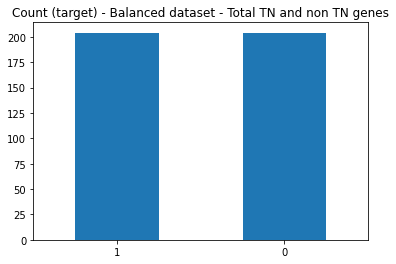

In [84]:

print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [85]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_test = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1.index.isin(total_pts_to_keep)]
occurrence_matrix_TNandNONTN_relgenes_q1_2_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_q1_2_test['Target'].value_counts())

total class of 1 and 0: 0    68
1    68
Name: Target, dtype: int64


In [87]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = pd.concat([occurrence_matrix_TNandNONTN_relgenes_q1_2_training, occurrence_matrix_TNandNONTN_relgenes_q1_2_test], axis=0)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,CDKN2A_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,MAML3_Intron_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


total class of 1 and 0: 1    272
0    272
Name: Target, dtype: int64


<AxesSubplot:title={'center':'Count (target) - Balanced dataset - Total TN and non TN genes'}>

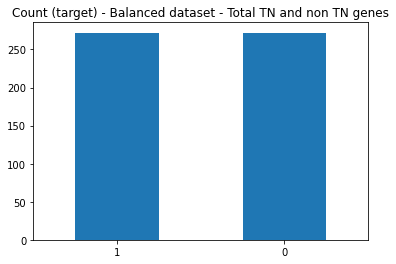

In [88]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [89]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         46
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     96
TP53_Missense_Mutation_173_177         26
TP53_Missense_Mutation_236_258         45
                                     ... 
MGAT5B_Splice_Region_noClust            1
MYL10_Nonsense_Mutation_noClust         1
NUP153_In_Frame_Del_noClust             2
MAML3_Intron_noClust                    0
Target                                272
Length: 168, dtype: int64

In [90]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [91]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
MGAT5B_Splice_Region_noClust          False
MYL10_Nonsense_Mutation_noClust       False
NUP153_In_Frame_Del_noClust           False
MAML3_Intron_noClust                   True
Target                                False
Length: 168, dtype: bool

In [92]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all().sum()

21

There are 21 columns containing all zero values.

In [93]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.eq(0).all()]
columns_to_drop

Index(['PIK3CA_Silent_1046_1047', 'TP53_Frame_Shift_Del_173_177',
       'TP53_Nonsense_Mutation_270_282', 'TP53_Silent_236_258',
       'PTEN_Frame_Shift_Ins_noClust', 'CDKN2A_Splice_Site_noClust',
       'NOTCH2_Splice_Site_noClust', 'PIK3R1_In_Frame_Ins_noClust',
       'PTEN_In_Frame_Del_noClust', 'ZKSCAN1_5'UTR_noClust',
       'MGAT5B_3'UTR_noClust', 'NBN_Silent_noClust', 'ZKSCAN1_Silent_noClust',
       'NOTCH2_Frame_Shift_Ins_noClust', 'MAML3_Frame_Shift_Del_noClust',
       'PTEN_3'UTR_noClust', 'PIK3R1_Splice_Site_noClust',
       'RB1_Splice_Region_noClust', 'MGAT5B_5'Flank_noClust',
       'CDKN2A_Frame_Shift_Ins_noClust', 'MAML3_Intron_noClust'],
      dtype='object')

In [94]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_BALANCED_VariantClass_afterMutClust.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

In [96]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        46
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    96
TP53_Missense_Mutation_173_177        26
TP53_Missense_Mutation_236_258        45
                                      ..
COIL_Frame_Shift_Ins_noClust           2
BRCA1_3'UTR_noClust                    4
MGAT5B_Splice_Region_noClust           1
MYL10_Nonsense_Mutation_noClust        1
NUP153_In_Frame_Del_noClust            2
Length: 146, dtype: int64

In [98]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y

brca_smc_2018_BB01_004    1
brca_smc_2018_BB01_014    0
brca_smc_2018_BB01_022    1
brca_smc_2018_BB01_024    0
brca_smc_2018_BB01_026    1
                         ..
MBCProject_2kS5fYc1       0
MBCProject_6zfRF2fl       0
MBCProject_epUYsdCE       1
MBCProject_oqupfDu7       1
MBCProject_pktAIxFb       0
Name: Target, Length: 544, dtype: int64

In [99]:
train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(onlyhugo_onlyTN_training_pts_q1_list)]
train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
y_train = train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y_train

brca_smc_2018_BB01_004    1
brca_smc_2018_BB01_014    0
brca_smc_2018_BB01_022    1
brca_smc_2018_BB01_024    0
brca_smc_2018_BB01_026    1
                         ..
MBCProject_mrhKt1Ue       0
MBCProject_p1CQTdIg       0
MBCProject_pMcWcrtZ       1
MBCProject_rJHBiKTl       1
MBCProject_rYSXcxcV       0
Name: Target, Length: 408, dtype: int64

In [101]:
X_train = train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.to_list()

['brca_smc_2018_BB01_005',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'brca_smc_2018_BR419',
 'BR-V-028',
 'BR-V-050',
 'BR-V-051',
 'BR-M-045',
 'BR-M-073',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X01BR015',
 'X11BR003',
 'X11BR011',
 'X11BR012',
 'X11BR014',
 'X18BR002',
 'X20BR008',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A04P',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0CP',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YE',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A07O',
 'TCGA-A8-A08P',
 'TCGA-A8-A08Z',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AN-A0AS',
 'TCGA-AN-A0XO',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AO-A129',
 

In [104]:
y_test = test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y_test

brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_017    0
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR145       1
                         ..
MBCProject_2kS5fYc1       0
MBCProject_6zfRF2fl       0
MBCProject_epUYsdCE       1
MBCProject_oqupfDu7       1
MBCProject_pktAIxFb       0
Name: Target, Length: 136, dtype: int64

In [105]:
X_test = test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['PIK3CA_In_Frame_Del_418_420', 'PIK3R1_Nonsense_Mutation_noClust',
       'NBN_Frame_Shift_Del_noClust', 'NUP153_Silent_noClust',
       'C6orf118_3'UTR_noClust', 'ZKSCAN1_Nonsense_Mutation_noClust',
       'MTMR12_3'UTR_noClust', 'LZTR1_Nonsense_Mutation_noClust',
       'LZTR1_Splice_Site_noClust', 'NBN_Splice_Site_noClust',
       'NUP153_Nonsense_Mutation_noClust', 'LZTR1_Frame_Shift_Ins_noClust'],
      dtype='object')

In [107]:
len(X_train.columns[(X_train == 0).all(axis=0)])

12

There are 12 columns in the training dataset with just 0 values. 

In [108]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['TP53_Frame_Shift_Del_211_218', 'PIK3CA_Missense_Mutation_418_420',
       'TP53_Missense_Mutation_211_218', 'PTEN_Frame_Shift_Del_317_318',
       'TP53_Frame_Shift_Del_191_199', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'TP53_Nonsense_Mutation_236_258',
       'TP53_In_Frame_Del_173_177', 'TP53_Frame_Shift_Del_270_282',
       'TP53_In_Frame_Del_211_218', 'TP53_Nonsense_Mutation_173_177',
       'MTMR12_Silent_520_521', 'PIK3CA_Silent_541_542',
       'NOTCH2_Frame_Shift_Ins_2297_2303', 'TP53_Frame_Shift_Ins_270_282',
       'TP53_Silent_191_199', 'PIK3CA_Nonsense_Mutation_418_420',
       'PIK3CA_In_Frame_Ins_102_113', 'PTEN_Frame_Shift_Ins_317_318',
       'ZNF195_Missense_Mutation_109_111', 'MYL10_Splice_Region_26_26',
       'PIK3CA_Frame_Shift_Ins_noClust', 'NOTCH2_Nonsense_Mutation_noClust',
       'FBXW7_Nonsense_Mutation_noClust', 'ZNF195_Frame_Shift_Del_noClust',
       'PIK3R1_Missense_Mutation_noClust', 'PTEN_Splice_Site_noClust',
       'PIK3CA_Sil

In [110]:
len(X_test.columns[(X_test == 0).all(axis=0)])

82

There are 82 columns in the test dataset with just zero values.

In [111]:
y_train.value_counts()

1    204
0    204
Name: Target, dtype: int64

In [112]:
y_test.value_counts()

0    68
1    68
Name: Target, dtype: int64

In [113]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [114]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_p1CQTdIg,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [115]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

12

12 columns contain NaN values, that are the columns with all zero values in the training set.

In [116]:
np.isinf(normalized_X_train).any().any()

False

In [117]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_mrhKt1Ue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_p1CQTdIg,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
normalized_X_train.isna().any().any()

False

In [119]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        35.0
MAML3_In_Frame_Ins_503_503             2.0
PIK3CA_Missense_Mutation_1046_1047    66.0
TP53_Missense_Mutation_173_177        15.0
TP53_Missense_Mutation_236_258        16.0
                                      ... 
COIL_Frame_Shift_Ins_noClust           2.0
BRCA1_3'UTR_noClust                    4.0
MGAT5B_Splice_Region_noClust           1.0
MYL10_Nonsense_Mutation_noClust        1.0
NUP153_In_Frame_Del_noClust            2.0
Length: 146, dtype: float64

In [120]:
normalized_X_train.sum(axis=0).sum()

623.0

In [121]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [122]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_oqupfDu7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [123]:
np.isinf(normalized_X_test).any().any()

True

In [124]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [125]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

12

12 as the number of zero columns in the training set 

In [126]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_oqupfDu7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [127]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NUP153_Nonsense_Mutation_noClust,PIK3R1_Frame_Shift_Ins_noClust,FBXW7_Frame_Shift_Ins_noClust,TP53_3'UTR_noClust,LZTR1_Frame_Shift_Ins_noClust,COIL_Frame_Shift_Ins_noClust,BRCA1_3'UTR_noClust,MGAT5B_Splice_Region_noClust,MYL10_Nonsense_Mutation_noClust,NUP153_In_Frame_Del_noClust
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_oqupfDu7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
np.isinf(normalized_X_test).any().sum()

0

In [129]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Select the test patients 


In [130]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['brca_smc_2018_BB01_005',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'brca_smc_2018_BR419',
 'BR-V-028',
 'BR-V-050',
 'BR-V-051',
 'BR-M-045',
 'BR-M-073',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X01BR015',
 'X11BR003',
 'X11BR011',
 'X11BR012',
 'X11BR014',
 'X18BR002',
 'X20BR008',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A04P',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0CP',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YE',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A07O',
 'TCGA-A8-A08P',
 'TCGA-A8-A08Z',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AN-A0AS',
 'TCGA-AN-A0XO',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AO-A129',
 

In [131]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_017
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR145
...,...
131,MBCProject_2kS5fYc1
132,MBCProject_6zfRF2fl
133,MBCProject_epUYsdCE
134,MBCProject_oqupfDu7


### Study the overlapping between 4B and 5B patients

In [132]:
pd.merge(test_patient_df, onlyhugo_onlyTN_test_pts_q1, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_017
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR145
...,...
131,MBCProject_2kS5fYc1
132,MBCProject_6zfRF2fl
133,MBCProject_epUYsdCE
134,MBCProject_oqupfDu7


## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.09741476208317722
Best cross-validation score:  0.7055706112616682


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

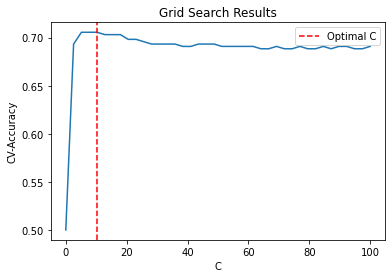

In [133]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.09741476208317722​ (C=10.27).

In [134]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7080397470641373
Standard Deviation of Accuracy: 0.07145606250638337
Mean Cross-Validation Precision - 1: 0.6913454739103504
Standard Deviation of Precision - 1: 0.07901480255739592
Mean Cross-Validation Recall - 1: 0.7896341463414636
Standard Deviation of Recall - 1: 0.06200353082383492
Mean Cross-Validation F1-score - 1: 0.7310464906329817
Standard Deviation of F1-score - 1: 0.03836553020315956


In [135]:
precision_scores_1 

array([0.70212766, 0.7173913 , 0.76190476, 0.73684211, 0.53846154])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [136]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7418761535622
Standard Deviation of Precision - 0: 0.04042281701063769
Mean Cross-Validation Recall - 0: 0.6231707317073172
Standard Deviation of Recall - 0: 0.18139193451856636
Mean Cross-Validation F1-score: - 0 0.662417524074679
Standard Deviation of F1-score: - 0 0.13943874079135246


In [137]:
precision_scores_0

array([0.77142857, 0.77777778, 0.775     , 0.69767442, 0.6875    ])

In [55]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=10.27)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

255 features have a coefficent different from zero.

### Study of the function Lasso

In [138]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000, tol=1e-6, warm_start=False, intercept_scaling=10000.0, C=10.27)   

In [139]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=10.27, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [140]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [141]:
y_pred_simple_Lasso

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [142]:
y_test

brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_017    0
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR145       1
                         ..
MBCProject_2kS5fYc1       0
MBCProject_6zfRF2fl       0
MBCProject_epUYsdCE       1
MBCProject_oqupfDu7       1
MBCProject_pktAIxFb       0
Name: Target, Length: 136, dtype: int64

In [143]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        68
           1       0.72      0.76      0.74        68

    accuracy                           0.74       136
   macro avg       0.74      0.74      0.74       136
weighted avg       0.74      0.74      0.74       136



In [144]:
coef_indexes = clf_simple_LogRegr.coef_[0].nonzero()[0]
# Numero delle feature con coefficiente diverso da zero
n_features = len(coef_indexes)
n_features

113

In [145]:
feature_names = X.columns[coef_indexes]
feature_names

Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'TP53_Frame_Shift_Del_211_218',
       ...
       'ATG4C_Nonsense_Mutation_noClust',
       'LZTR1_Translation_Start_Site_noClust',
       'ZNF195_Missense_Mutation_noClust', 'PIK3R1_Frame_Shift_Ins_noClust',
       'FBXW7_Frame_Shift_Ins_noClust', 'TP53_3'UTR_noClust',
       'COIL_Frame_Shift_Ins_noClust', 'BRCA1_3'UTR_noClust',
       'MGAT5B_Splice_Region_noClust', 'MYL10_Nonsense_Mutation_noClust'],
      dtype='object', length=113)

## Evaluate the model with classification metrics 

In [146]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7352941176470589


In [147]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[48 20]
 [16 52]]


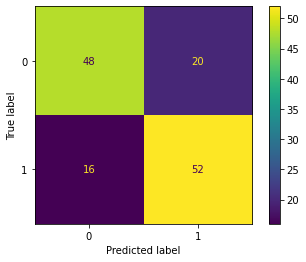

In [148]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [149]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [150]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.7222222222222222


In [151]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [152]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7647058823529411


In [153]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [154]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7428571428571428


In [155]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [156]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

52

In [157]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

48

In [158]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

20

In [159]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

16

In [160]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.4714045207910317


# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  2.5738461538461537
Best cross-validation score:  0.7154772658837698


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

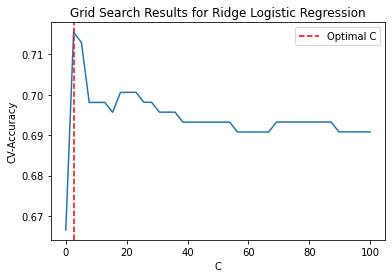

In [162]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.389 (C=2.57).

### Compute the classification metrics on the cross-validation results 

In [163]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7154772658837698
Standard Deviation of Accuracy: 0.07767381051177036
Mean Cross-Validation Precision - 1: 0.6926015603981706
Standard Deviation of Precision - 1: 0.07977315552448659
Mean Cross-Validation Recall - 1: 0.8039024390243903
Standard Deviation of Recall - 1: 0.03454815845780637
Mean Cross-Validation F1-score - 1: 0.7413909337137132
Standard Deviation of F1-score - 1: 0.053040542271028245


In [164]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.752966147966148
Standard Deviation of Precision - 0: 0.06578798813188498
Mean Cross-Validation Recall - 0: 0.6279268292682927
Standard Deviation of Recall - 0: 0.14817971467299795
Mean Cross-Validation F1-score: - 0 0.6790143719968282
Standard Deviation of F1-score: - 0 0.12026634334321994


## Ridge on the test set

In [165]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=2.57)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        68
           1       0.72      0.76      0.74        68

    accuracy                           0.74       136
   macro avg       0.74      0.74      0.74       136
weighted avg       0.74      0.74      0.74       136

Numero di feature con coefficiente diverso da zero: 134
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'TP53_Frame_Shift_Del_211_218',
       ...
       'LZTR1_Translation_Start_Site_noClust',
       'ZNF195_Missense_Mutation_noClust', 'PIK3R1_Frame_Shift_Ins_noClust',
       'FBXW7_Frame_Shift_Ins_noClust', 'TP53_3'UT

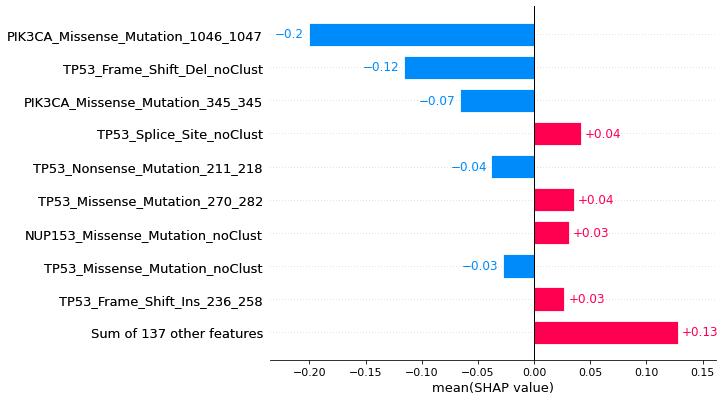

In [166]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [167]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=2.57)

In [168]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [169]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [170]:
y_pred_simple_Ridge

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [171]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7352941176470589


In [172]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[48 20]
 [16 52]]


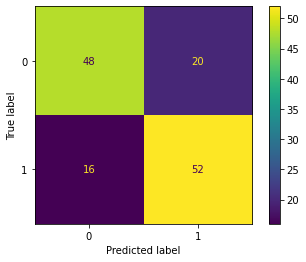

In [173]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [174]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7222222222222222


In [175]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.7647058823529411


In [176]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7428571428571428


In [177]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

52

In [178]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

48

In [179]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

20

In [180]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

16

In [181]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.4714045207910317


# Full Logistic Regression

## Cross-validation

In [182]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.7195122  0.74390244 0.76829268 0.7037037  0.50617284]
Mean CV Accuracy: 0.6883167720566095


In [183]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.6883167720566095
Standard Deviation of Accuracy: 0.09367202030750739
Mean Cross-Validation Precision - 1: 0.6683392315470171
Standard Deviation of Precision - 1: 0.08600382017893639
Mean Cross-Validation Recall - 1: 0.7891463414634147
Standard Deviation of Recall - 1: 0.03347866395059272
Mean Cross-Validation F1-score - 1: 0.7207863540611905
Standard Deviation of F1-score - 1: 0.06059928971435216


In [184]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.7169762641898864
Standard Deviation of Precision - 0: 0.10021402079229158
Mean Cross-Validation Recall - 0: 0.5886585365853658
Standard Deviation of Recall - 0: 0.17398109944049184
Mean Cross-Validation F1-score: - 0 0.639898767898768
Standard Deviation of F1-score: - 0 0.1549621168997793


## Full Logistic Regression on the test set 

In [185]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [186]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        68
           1       0.70      0.76      0.73        68

    accuracy                           0.72       136
   macro avg       0.72      0.72      0.72       136
weighted avg       0.72      0.72      0.72       136



### Study of the full logistic regression function

In [187]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [188]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [189]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [190]:
y_pred_full_logreg

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [191]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.7205882352941176


In [192]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[46 22]
 [16 52]]


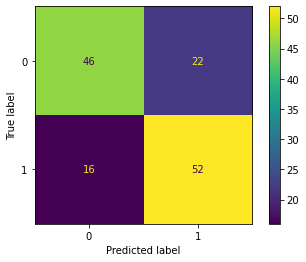

In [193]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [194]:
print("Precision ", precision(cm_full_logreg))

Precision  0.7027027027027027


In [195]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.7647058823529411


In [196]:
print("F1:", f1(cm_full_logreg))

F1: 0.7323943661971832


In [197]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

52

In [198]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

46

In [199]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

22

In [200]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

16

In [201]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.44290394651811943


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 7.701538461538462
Best cv accuracy: 0.6859078590785908


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

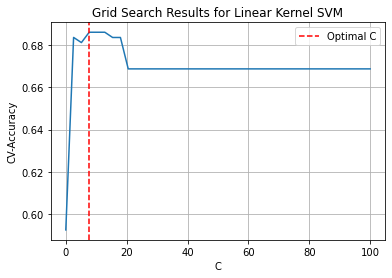

In [202]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 7.7

### Compute the classification metrics on the cross-validation results

In [203]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6859078590785908
Standard Deviation of Accuracy: 0.06880641522170076
Mean Cross-Validation Precision - 1: 0.6590185536245288
Standard Deviation of Precision - 1: 0.06367910277911988
Mean Cross-Validation Recall - 1: 0.7992682926829269
Standard Deviation of Recall - 1: 0.07248294636247127
Mean Cross-Validation F1-score - 1: 0.7188044270829022
Standard Deviation of F1-score - 1: 0.050455827819070216


In [204]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.7373484848484848
Standard Deviation of Precision - 0: 0.06724251983551184
Mean Cross-Validation Recall - 0: 0.5739024390243902
Standard Deviation of Recall - 0: 0.14260181142278278
Mean Cross-Validation F1-score: - 0 0.6363252418158141
Standard Deviation of F1-score: - 0 0.1185806097278128


# Linear SVM on the test set 

In [205]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=7.7)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [206]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        68
           1       0.72      0.79      0.76        68

    accuracy                           0.74       136
   macro avg       0.75      0.74      0.74       136
weighted avg       0.75      0.74      0.74       136



### Study of the Linear SVM function

In [207]:
clf_linear_svm = SVC(kernel='linear', C=7.7)

In [208]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=7.7, kernel='linear')

In [209]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [210]:
y_pred_linear_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [211]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7426470588235294


In [212]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[47 21]
 [14 54]]


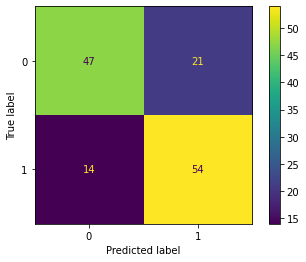

In [213]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [214]:
print("Precision ", precision(cm_linear_svm))

Precision  0.72


In [215]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7941176470588235


In [216]:
print("F1:", f1(cm_linear_svm))

F1: 0.7552447552447551


In [217]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

54

In [218]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

47

In [219]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

21

In [220]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

14

In [221]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.487886038830018


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [222]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 4
Best coef0: 5.0
Best cv accuracy: 0.6935561577838


### Compute the classification metrics on the cross-validation results

In [225]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.6935561577838
Standard Deviation of Accuracy: 0.05610876880091053
Mean Cross-Validation Precision - 1: 0.6525855041644515
Standard Deviation of Precision - 1: 0.053463721051842675
Mean Cross-Validation Recall - 1: 0.853048780487805
Standard Deviation of Recall - 1: 0.0870991284666785
Mean Cross-Validation F1-score - 1: 0.7352143431986244
Standard Deviation of F1-score - 1: 0.044331373993448026


In [226]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.7912804232804233
Standard Deviation of Precision - 0: 0.07400730475258865
Mean Cross-Validation Recall - 0: 0.5346341463414633
Standard Deviation of Recall - 0: 0.12800951779010125
Mean Cross-Validation F1-score: - 0 0.6278627034330793
Standard Deviation of F1-score: - 0 0.09833852124284245


## Polynomial SVM on the test set 

In [227]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=5)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [228]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        68
           1       0.71      0.79      0.75        68

    accuracy                           0.74       136
   macro avg       0.74      0.74      0.73       136
weighted avg       0.74      0.74      0.73       136



### Study of the Polynomial SVM function

In [229]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=5)

In [230]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=5, degree=4, kernel='poly')

In [231]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [232]:
y_pred_poly_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [233]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7352941176470589


In [234]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[46 22]
 [14 54]]


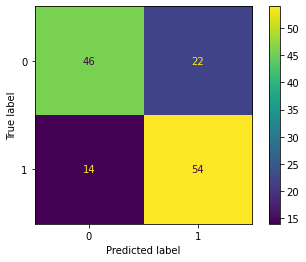

In [235]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [236]:
print("Precision ", precision(cm_poly_svm))

Precision  0.7105263157894737


In [237]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.7941176470588235


In [238]:
print("F1:", f1(cm_poly_svm))

F1: 0.7499999999999999


In [239]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

54

In [240]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

46

In [241]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

22

In [242]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

14

In [243]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.47387910220727386


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [244]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 75.00025
Best gamma: 0.001
Best cv accuracy: 0.6688045769346582


### Compute the classification metrics on the cross-validation results

In [245]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.6688045769346582
Standard Deviation of Accuracy: 0.06831086949765038
Mean Cross-Validation Precision - 1: 0.6141221134663757
Standard Deviation of Precision - 1: 0.05589768340201832
Mean Cross-Validation Recall - 1: 0.9410975609756097
Standard Deviation of Recall - 1: 0.01979820865715185
Mean Cross-Validation F1-score - 1: 0.7416782699357617
Standard Deviation of F1-score - 1: 0.04091783658354774


In [246]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.8586898395721926
Standard Deviation of Precision - 0: 0.07142873483842523
Mean Cross-Validation Recall - 0: 0.39682926829268295
Standard Deviation of Recall - 0: 0.13419422648671453
Mean Cross-Validation F1-score: - 0 0.532939857614617
Standard Deviation of F1-score: - 0 0.13505420667516138


### Radial SVM on the test set 

In [247]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=75, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [248]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        68
           1       0.60      0.85      0.71        68

    accuracy                           0.65       136
   macro avg       0.68      0.65      0.63       136
weighted avg       0.68      0.65      0.63       136



### Study of the Radial SVM function

In [249]:
clf_radial_svm = SVC(kernel='rbf', C=75, gamma=0.001)

In [250]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=75, gamma=0.001)

In [251]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [252]:
y_pred_radial_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [253]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.6470588235294118


In [254]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[30 38]
 [10 58]]


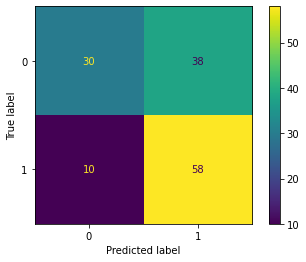

In [255]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [256]:
print("Precision ", precision(cm_radial_svm))

Precision  0.6041666666666666


In [257]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.8529411764705882


In [258]:
print("F1:", f1(cm_radial_svm))

F1: 0.7073170731707317


In [259]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

58

In [260]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

30

In [261]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

38

In [262]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

10

In [263]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.3227486121839514


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [264]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 15, 'n_estimators': 300}
Best cross-validation score (accuracy): 0.6981632038542608
OOB score of best model: 0.7083333333333334


### Compute the classification metrics on the cross-validation results 

In [265]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.6981632038542608
Standard Deviation of Accuracy: 0.074632299981003
Mean Cross-Validation Precision - 1: 0.6771866850995758
Standard Deviation of Precision - 1: 0.07292478269138776
Mean Cross-Validation Recall - 1: 0.7893902439024391
Standard Deviation of Recall - 1: 0.07915714534100243
Mean Cross-Validation F1-score - 1: 0.7243716607228332
Standard Deviation of F1-score - 1: 0.056678235369165685


In [266]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7390017825311943
Standard Deviation of Precision - 0: 0.07246401708965745
Mean Cross-Validation Recall - 0: 0.6084146341463414
Standard Deviation of Recall - 0: 0.15165574372374474
Mean Cross-Validation F1-score: - 0 0.6583925027859454
Standard Deviation of F1-score: - 0 0.12059249306209584


In [267]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=15, n_estimators=300, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [268]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        68
           1       0.70      0.72      0.71        68

    accuracy                           0.71       136
   macro avg       0.71      0.71      0.71       136
weighted avg       0.71      0.71      0.71       136



### Study the Random Forest function

In [269]:
clf_rf = RandomForestClassifier(max_features=15, n_estimators=300, random_state=123)

In [270]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=300, random_state=123)

In [271]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [272]:
y_pred_rf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [273]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7058823529411765


In [274]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[47 21]
 [19 49]]


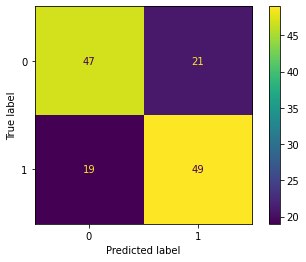

In [275]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [276]:
print("Precision ", precision(cm_rf))

Precision  0.7


In [277]:
print("Recall:", recall(cm_rf))

Recall: 0.7205882352941176


In [278]:
print("F1:", f1(cm_rf))

F1: 0.7101449275362319


In [279]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

49

In [280]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

47

In [281]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

21

In [282]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

19

In [283]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.4119429204355498


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [284]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.1
Best Max Depth: 9
Best Number of Trees: 100
Best Accuracy: 0.7230352303523035


### Compute the classification metrics on the cross-validation results 

In [285]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7230352303523035
Standard Deviation of Accuracy: 0.036253640126158594
Mean Cross-Validation Precision - 1: 0.7037330254549452
Standard Deviation of Precision - 1: 0.034548151124525625
Mean Cross-Validation Recall - 1: 0.7692682926829268
Standard Deviation of Recall - 1: 0.044750614404603775
Mean Cross-Validation F1-score - 1: 0.734884388050541
Standard Deviation of F1-score - 1: 0.037870670082313734


In [286]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.7469028253238779
Standard Deviation of Precision - 0: 0.04068874798615514
Mean Cross-Validation Recall - 0: 0.6767073170731708
Standard Deviation of Recall - 0: 0.03388488754308115
Mean Cross-Validation F1-score: - 0 0.7098439501870548
Standard Deviation of F1-score: - 0 0.03476863669213315


In [287]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=9, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [288]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73        68
           1       0.72      0.74      0.73        68

    accuracy                           0.73       136
   macro avg       0.73      0.73      0.73       136
weighted avg       0.73      0.73      0.73       136



### Study the eXtreme Gradient Boosting function

In [289]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=9, random_state=123) 

In [290]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [291]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [292]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7279411764705882


In [293]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[49 19]
 [18 50]]


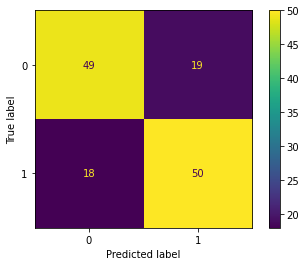

In [294]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [295]:
print("Precision ", precision(cm_xgb))

Precision  0.7246376811594203


In [296]:
print("Recall:", recall(cm_xgb))

Recall: 0.7352941176470589


In [297]:
print("F1:", f1(cm_xgb))

F1: 0.7299270072992701


In [298]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

50

In [299]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

49

In [300]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

19

In [301]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

18

In [302]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.45593165617529463
